In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN, OPTICS, Birch

In [5]:
df = pd.read_csv("sample_dataset.csv")

In [6]:
df.head()

,Location ID,Latitude,Longitude,Weight
0,1,35.844051,51.288501,10
1,51,35.615146,51.231918,15
2,101,35.843410,51.425973,50
3,151,35.802851,51.569993,20
4,201,35.671532,51.384217,11


## cluster based on 25 visitors
the number of points in each cluster should be approximately equal
the distance between the points in each cluster should be as small as possible
the distance between the clusters should be as large as possible
the total money spent by each cluster should be approximately equal

In [7]:
#normalize column 4 between 0 and 1
df['Weight'] = (df['Weight'] - df['Weight'].min()) / (df['Weight'].max() - df['Weight'].min())
df['Weight'].head()

0    0.183673
1    0.285714
2    1.000000
3    0.387755
4    0.204082
Name: Weight, dtype: float64

In [8]:
df = df.dropna()
model = AgglomerativeClustering(n_clusters=25, affinity='euclidean', linkage='ward').fit(df.iloc[:, 1:3])

In [9]:
df["cluster"] = model.labels_
df["cluster"].value_counts()

0     378
4     282
2     274
5     264
11    247
1     244
9     227
12    222
17    221
3     214
8     211
13    199
6     197
14    180
7     180
18    177
19    163
15    162
24    153
16    145
21    139
22    135
10    134
23    128
20    124
Name: cluster, dtype: int64

## plot the clusters

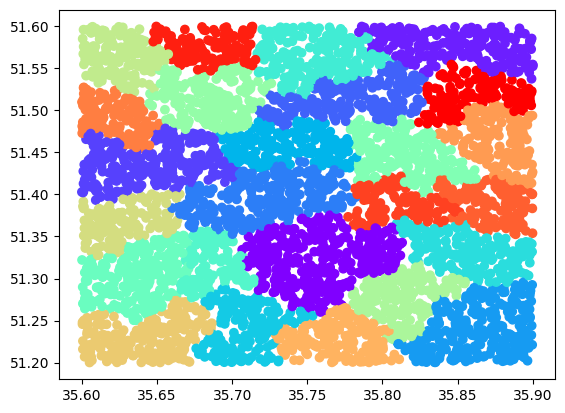

In [10]:
plt.scatter(df.iloc[:, 1], df.iloc[:, 2], c=model.labels_, cmap="rainbow")

In [19]:
model_with_weight = AgglomerativeClustering(n_clusters=25, affinity='euclidean', linkage='ward').fit(df.iloc[:, 1:4])

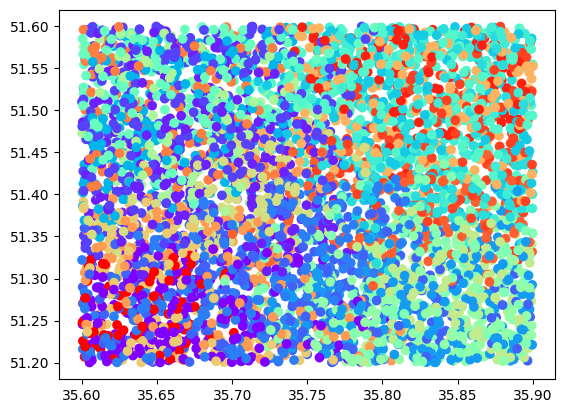

In [20]:
plt.scatter(df.iloc[:, 1], df.iloc[:, 2], c=model_with_weight.labels_, cmap="rainbow")

In [21]:
def cluster_data(data, min_cluster_size, max_cluster_size):
    cluster_sizes = range(min_cluster_size, max_cluster_size)
    models = []
    for size in cluster_sizes:
        model = AgglomerativeClustering(n_clusters=size, affinity='euclidean', linkage='ward').fit(data)
        models.append(model)
    return models

In [25]:
models = cluster_data(df.iloc[:, 1:4], 2, 50)

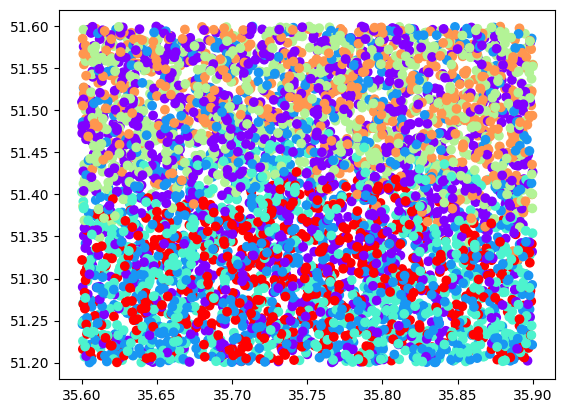

In [27]:
plt.scatter(df.iloc[:, 1], df.iloc[:, 2], c=models[4].labels_, cmap="rainbow")